## 08 LOGISTIC REGRESSION 

- 1. Data Exploration:
    - a. Load the dataset and perform exploratory data analysis (EDA).
    - b. Examine the features, their types, and summary statistics.
    - c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
    - Analyze any patterns or correlations observed in the data.
- 2. Data Preprocessing:
    - a. Handle missing values (e.g., imputation).
    - b. Encode categorical variables.
- 3. Model Building:
    - a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
    - b. Train the model using the training data.
- 4. Model Evaluation:
    - a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
    - Visualize the ROC curve.
- 5. Interpretation:
    - a. Interpret the coefficients of the logistic regression model.
    - b. Discuss the significance of features in predicting the target variable (survival probability in this case).
- 6. Deployment with Streamlit:
    - In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

    - (optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
    - Detailed deployment instructions are available in the Streamlit Documentation.


In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


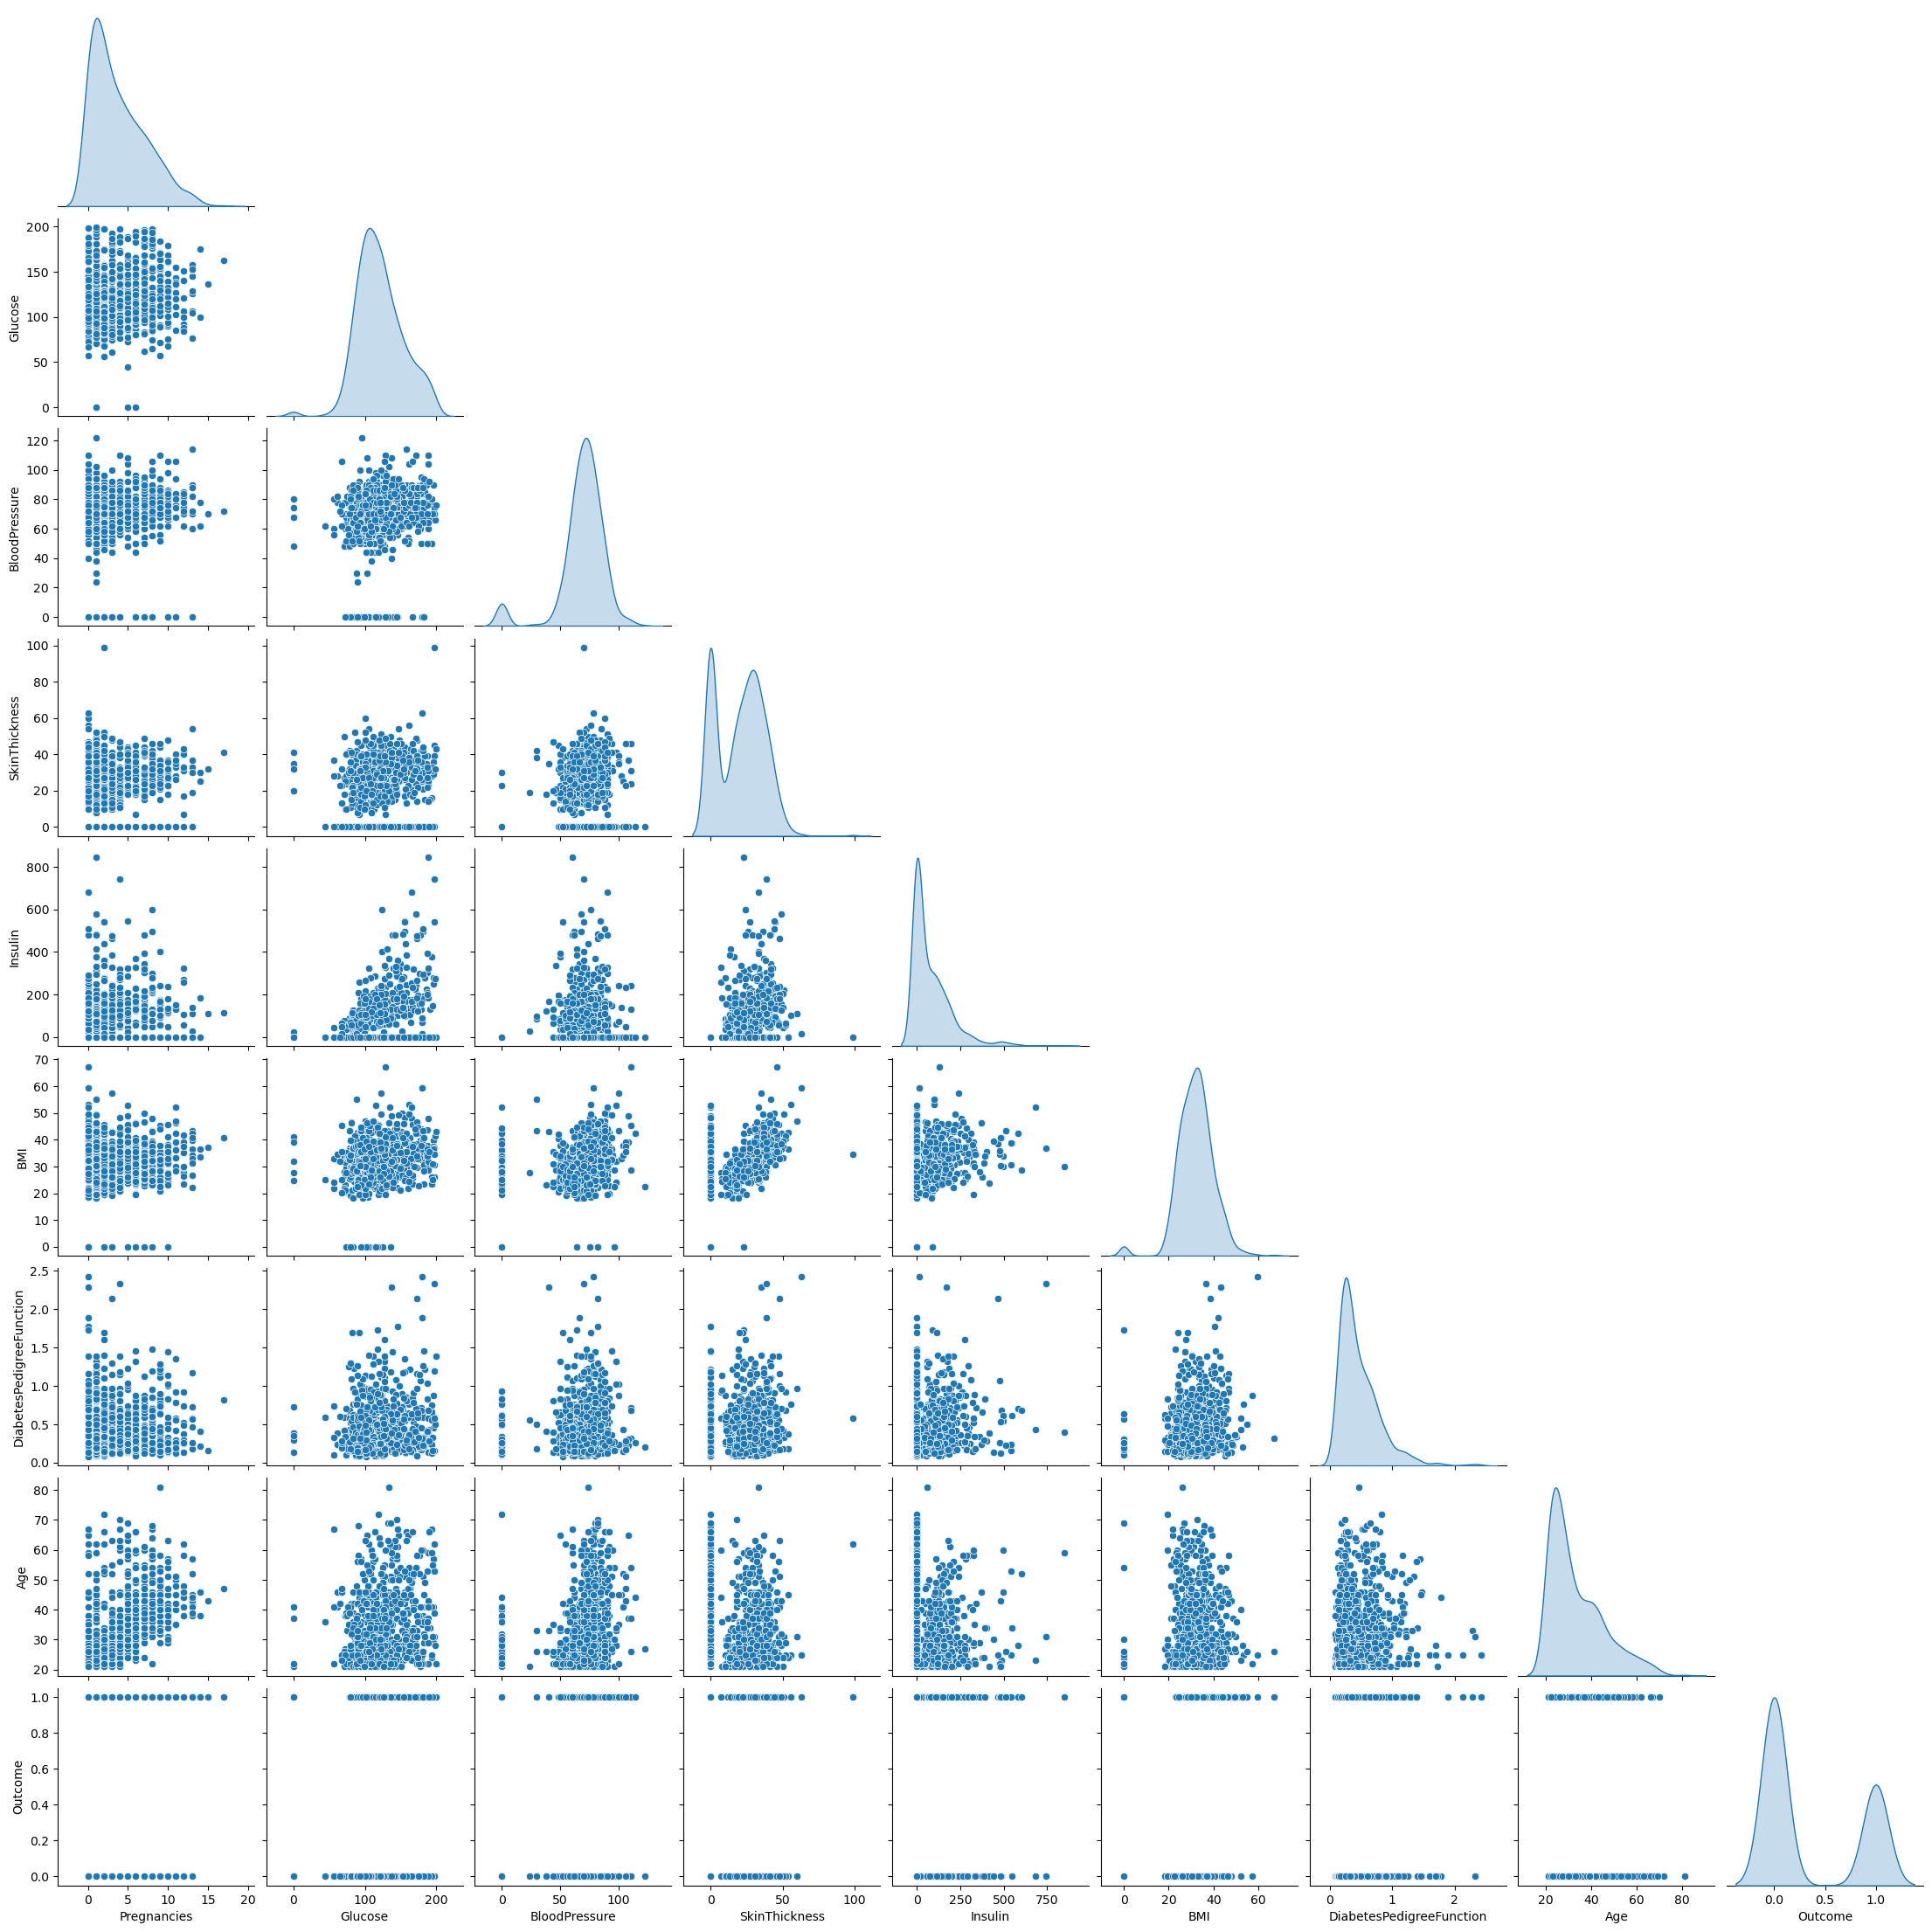

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, diag_kind = 'kde' , corner = True)
plt.show()

<Axes: >

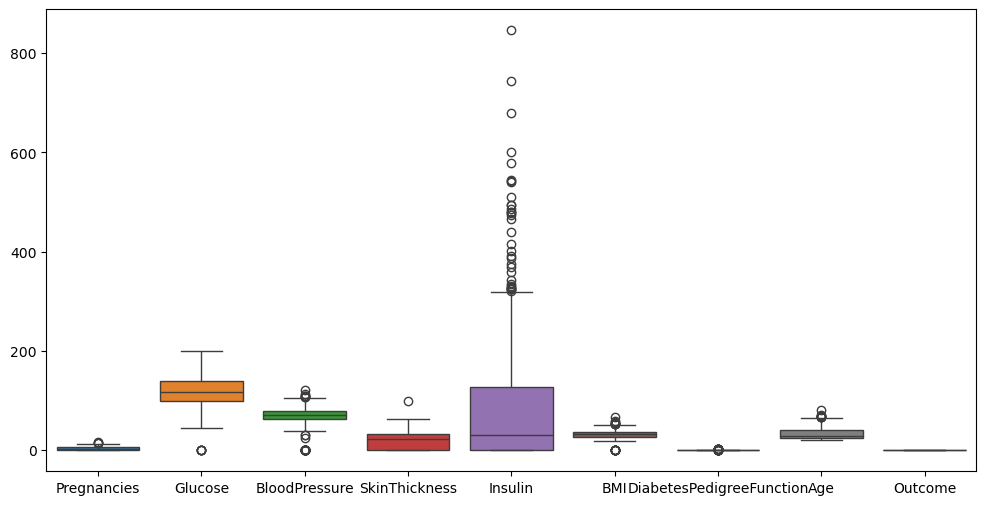

In [6]:
plt.figure(figsize = (12,6))
sns.boxplot(df) #Outlier Detection 

In [7]:
new_df = df.copy()

for cols in new_df.columns :
    Q1 = new_df[cols].quantile(0.25)
    Q3 = new_df[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = new_df[(new_df[cols] < lower_bound) | (new_df[cols] > upper_bound)]
    print(f"{cols} : {len(outliers)} Outliers")

Pregnancies : 4 Outliers
Glucose : 5 Outliers
BloodPressure : 45 Outliers
SkinThickness : 1 Outliers
Insulin : 34 Outliers
BMI : 19 Outliers
DiabetesPedigreeFunction : 29 Outliers
Age : 9 Outliers
Outcome : 0 Outliers


In [8]:
for cols in new_df.columns :
    Q1 = new_df[cols].quantile(0.25)
    Q3 = new_df[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    new_df = new_df[(new_df[cols] > lower_bound) & (new_df[cols] < upper_bound)]
print(f"Orignal Dataset {df.shape}")
print(f"New Dataset {new_df.shape}")

Orignal Dataset (768, 9)
New Dataset (636, 9)


In [9]:
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


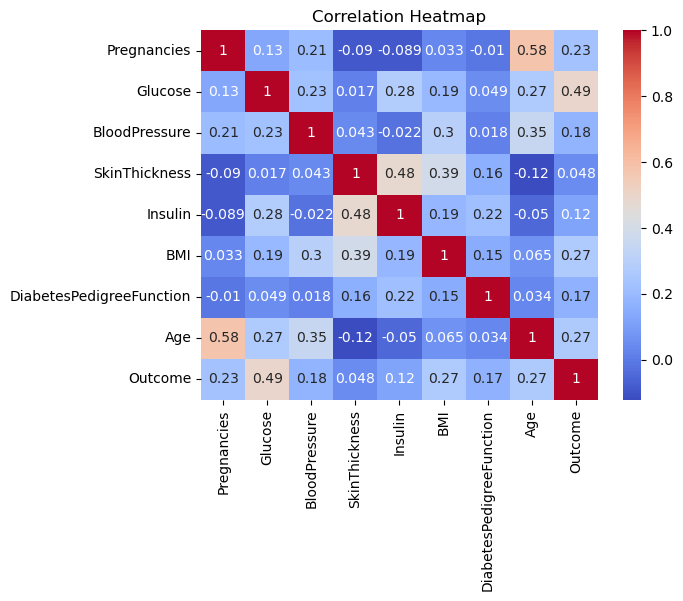

In [10]:
plt.title("Correlation Heatmap")
sns.heatmap(new_df.corr() , cmap = 'coolwarm', annot = True)
plt.show()

#### 2 Data Preprocessing:
- a. Handle missing values (e.g., imputation).
    - There Are no Missing Values In this Dataset 
- b. Encode categorical variables.
    - All Columns Are Numerical That's Why Encoding No Needed.

#### 3. Model Building:
    - a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
    - b. Train the model using the training data.

In [11]:
X = new_df.drop("Outcome" , axis = "columns")
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y = new_df["Outcome"]
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

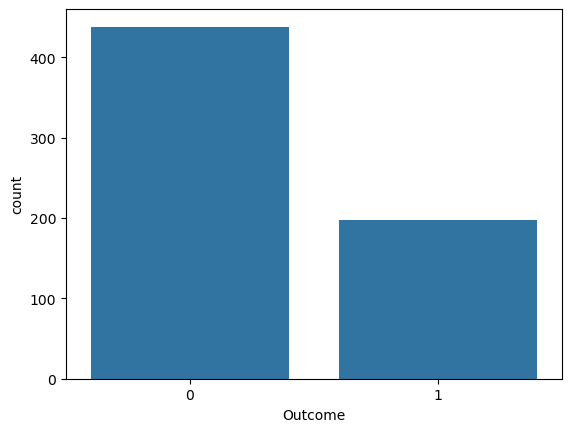

In [13]:
sns.countplot(x = y)

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [15]:
scaled_X = ss.fit_transform(X)
scaled_X

array([[ 6.81425557e-01,  1.00708292e+00, -1.25217228e-03, ...,
         2.50111624e-01,  8.25676652e-01,  1.60448130e+00],
       [-8.57589551e-01, -1.16845075e+00, -5.32173219e-01, ...,
        -8.40696515e-01, -3.04410807e-01, -1.44283201e-01],
       [ 1.29703160e+00,  2.21571274e+00, -7.09146901e-01, ...,
        -1.35493464e+00,  1.00993004e+00, -5.22429645e-02],
       ...,
       [ 3.73622536e-01,  7.47113491e-02, -1.25217228e-03, ...,
        -9.03028409e-01, -7.38429903e-01, -2.36323438e-01],
       [-8.57589551e-01,  2.47372752e-01, -1.06309427e+00, ...,
        -2.95292446e-01, -3.12599846e-01,  1.32836059e+00],
       [-8.57589551e-01, -8.92192506e-01, -1.78225855e-01, ...,
        -2.48543526e-01, -4.51813519e-01, -8.80605094e-01]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X,y , test_size = 0.2 , random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((508, 8), (128, 8), (508,), (128,))

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( max_iter=100)
lr.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import classification_report , confusion_matrix, f1_score, recall_score, precision_score, roc_curve,roc_auc_score

In [20]:
print(f"F1 Score : {f1_score(y_test, y_pred)}")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

F1 Score : 0.4067796610169492
Confusion Matrix : 
 [[81 16]
 [19 12]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        97
           1       0.43      0.39      0.41        31

    accuracy                           0.73       128
   macro avg       0.62      0.61      0.61       128
weighted avg       0.72      0.73      0.72       128



In [21]:
df["Outcome"].value_counts() 

Outcome
0    500
1    268
Name: count, dtype: int64

Recall: 0.39
Precision: 0.43
F1-score: 0.41
AUC Score : 0.6110741602926505


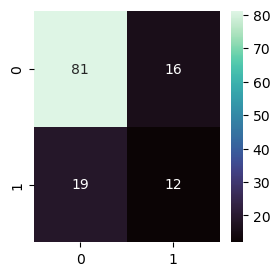

In [22]:
# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", np.round(recall,2))

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", np.round(precision,2))

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", np.round(f1,2))

auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score : {auc_score}")

cm = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = cm.ravel()
plt.figure(figsize=(3,3))
sns.heatmap(cm,
            cmap='mako',
            annot=True,
            fmt='d'
           )
plt.show()

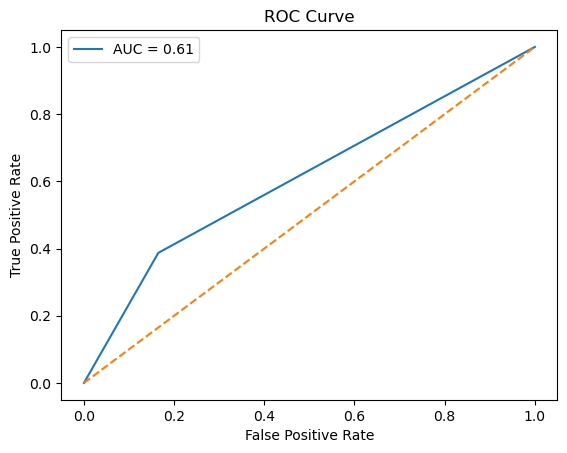

In [23]:
auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##### 5. Interpretation:

- a. Interpret the coefficients of the logistic regression model.
- b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [24]:
coefficients = pd.Series(lr.coef_[0], X.columns) # Get the feature names and their corresponding coefficients
intercept = lr.intercept_[0]

print("Intercept:", intercept)
print("\nCoefficients:\n", coefficients)

Intercept: -1.0391075187512027

Coefficients:
 Pregnancies                 0.422159
Glucose                     1.264948
BloodPressure              -0.042300
SkinThickness               0.008609
Insulin                    -0.028637
BMI                         0.558253
DiabetesPedigreeFunction    0.278687
Age                         0.165284
dtype: float64


In [25]:
coefficients = pd.Series(lr.coef_[0], index=X.columns) # Get the feature names and their corresponding coefficients
coefficients_sorted = coefficients.abs().sort_values(ascending=False) # Sort by absolute value for significance
print(coefficients_sorted)

Glucose                     1.264948
BMI                         0.558253
Pregnancies                 0.422159
DiabetesPedigreeFunction    0.278687
Age                         0.165284
BloodPressure               0.042300
Insulin                     0.028637
SkinThickness               0.008609
dtype: float64


| Feature                 | Coefficient |
| ----------------------- | ----------- |
|Glucose                  |  1.264948   |
|BMI                      |  0.558253   |
|Pregnancies              |  0.422159   |
|DiabetesPedigreeFunction |  0.278687   |
|Age                      |  0.165284   |
|BloodPressure            |  0.042300   |
|Insulin                  |  0.028637   |
|SkinThickness            |  0.008609   |

#### 6. Deployment with Streamlit:
- In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

- (optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
- Detailed deployment instructions are available in the Streamlit Documentation.
- https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app 


In [26]:
import pickle

with open("logistic_model.pkl", "wb") as file:
    pickle.dump(lr, file)

In [27]:
import streamlit as st
import pickle
import numpy as np

# Load trained model
with open("logistic_model.pkl", "rb") as file:
    model = pickle.load(file)

st.title("Diabetes Prediction App")
st.write("Enter patient details to predict diabetes")

# User inputs
pregnancies = st.number_input("Pregnancies", 0, 20)
glucose = st.number_input("Glucose Level", 0, 300)
blood_pressure = st.number_input("Blood Pressure", 0, 200)
skin_thickness = st.number_input("Skin Thickness", 0, 100)
insulin = st.number_input("Insulin", 0, 900)
bmi = st.number_input("BMI", 0.0, 70.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.0, 3.0)
age = st.number_input("Age", 1, 120)

# Prediction button
if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, blood_pressure,
                             skin_thickness, insulin, bmi, dpf, age]])
    
    prediction = model.predict(input_data)

    if prediction[0] == 1:
        st.error("⚠️ The person is likely to have diabetes")
    else:
        st.success("✅ The person is not likely to have diabetes")

2026-02-07 15:59:13.961 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 15:59:15.275 
  command:

    streamlit run C:\Users\shivi\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-07 15:59:15.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 15:59:15.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 15:59:15.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 15:59:15.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 15:59:15.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 15:59:15.286 Thread 'MainThread': mi

#### Interview Questions:
- 1. What is the difference between precision and recall?

- 1. Precision
    - Definition: The proportion of correctly predicted positive observations to the total predicted positives.
    - Formula: Precision = True Positives(TP) /True Positives (TP)+False Positives (FP)
    - Interpretation: Out of all the positive labels the model predicted, how many were actually correct?
    - High Precision: Few false positives.
- 2. Recall (Sensitivity or True Positive Rate)
    - Definition: The proportion of correctly predicted positive observations to all actual positives.
    - Formula: Recall = True Positives (TP) / True Positives (TP)+False Negatives (FN)
    - Interpretation: Out of all the actual positive cases, how many did the model correctly identify?
    - High Recall: Few false negatives.

- 2. What is cross-validation, and why is it important in binary classification?

- What is Cross-Validation?
    - Cross-validation is a model evaluation technique used to assess how well a machine learning model will generalize to an independent dataset.
    - The idea is to split the dataset into multiple subsets, train the model on some of them, and validate it on the remaining ones — repeating this process multiple times.
    - Most Common Type: K-Fold Cross-Validation
    - Split the dataset into K equal parts (folds).
    - For each fold:
        - Use K-1 folds for training.
        - Use 1 fold for testing/validation.
        - Repeat K times, each time with a different fold used as the validation set.
        - Average the results to get a more reliable estimate of model performance.
- Why is Cross-Validation Important in Binary Classification?
    - Avoids Overfitting
    - Training on only one split may cause the model to perform well there but poorly on unseen data.
    - Cross-validation tests on multiple splits, ensuring the model is not memorizing the data.
    - Gives Reliable Performance Metrics
    - For binary classification, metrics like accuracy, precision, recall, F1-score, and AUC can vary across splits.
    - Cross-validation gives an average, which is more stable and trustworthy.
    - Handles Imbalanced Datasets
    - Using Stratified K-Fold ensures each fold has a similar proportion of positive and negative classes, which is crucial in binary classification (e.g., spam vs. not spam, disease vs. no disease).
    - Model Selection and Hyperparameter Tuning
    - When tuning models using techniques like GridSearchCV or RandomizedSearchCV, cross-validation helps compare models fairly and robustly.